# Diabetes Prediction 
### Team name- ZAPS

#### Team members- Zeeshan Equbal , Abhraneil Bhattacharya , Pratyay , Shivam

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os 
print("Modules loaded!!")

Modules loaded!!


In [2]:
pwd

'C:\\Users\\Lenovo\\Desktop\\Git_dir\\Python_for_Data_Science\\ML Projects\\pima-indians-diabetes-database'

In [6]:
df = pd.read_csv('diabetes.csv', index_col=None)
print("Dataset loaded!!")
df.head(10)

Dataset loaded!!


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
print("The dataset has {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataset has 768 rows and 9 columns


In [9]:
# Checking for any null values in dataset. Alternatively, we can also use the 'dataframe.info()' method.
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [10]:
df.info()    #for checking our data types as well as null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [12]:
#getting a summary of our data :
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Visualising our data using seaborn

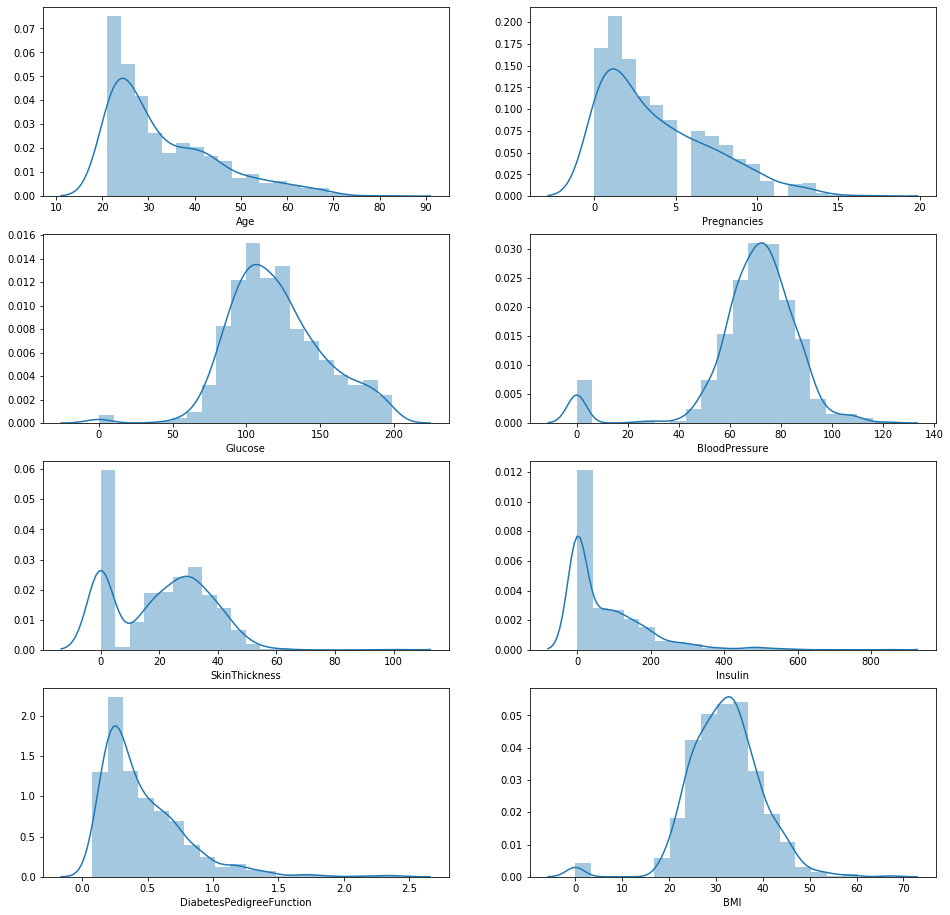

In [11]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

### Checking for correlation between features of the dataset

In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


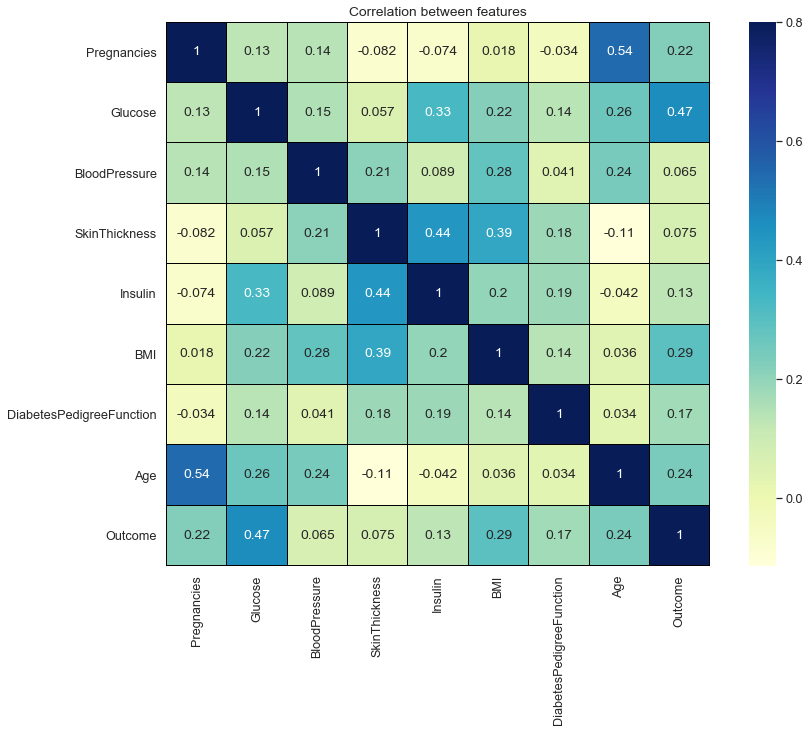

In [15]:
# Visualizing the correlation with the help of a heatmap would help a lot to understand the important features for prediction.

correlation = df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(correlation, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');


## Model Deployment

### Using Naive Bayes for prediction

In [16]:
import math
import random

In [187]:
# Splitting the dataset into training and test
def splitDataset(dataset,splitRatio):
    trainSize=int(len(dataset)*splitRatio)
    trainSet=[]
    copy=df.to_numpy().tolist();
    while len(trainSet)<trainSize:
        index=random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

In [38]:
# Function to seperate data-values by class
def seperateByClass(dataset):
    seperated={}
    for i in range (len(dataset)):
        vector=dataset[i]
        if(vector[-1] not in seperated):
            seperated[vector[-1]]=[]
        seperated[vector[-1]].append(vector)
    return seperated

In [39]:
# Function to compute mean
def mean(numbers):
    return sum(numbers)/float(len(numbers))

In [40]:
# Function to calculate Standard-deviation
def std(numbers):
    avg=mean(numbers)
    variance=sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

In [41]:
def summarize(dataset):
    summaries=[(mean(attributes),std(attributes)) for attributes in zip(*dataset)]
    del(summaries[-1])
    return summaries

In [42]:
def summarizeByClass(dataset):
    seperated=seperateByClass(dataset)
    summaries={}
    for classValue, instances in seperated.items():
        summaries[classValue]=summarize(instances)
    return summaries

In [43]:
def calculateProb(x, mean, stdev):
    exponent=math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1/(math.sqrt(2*math.pi)*stdev))*exponent

In [44]:
def calculateClassProb(summaries, inputVector):
    probabilities={}
    for classValues, classSummaries in summaries.items():
        probabilities[classValues]=1
        for i in range(len(classSummaries)):
            mean, stdev=classSummaries[i]
            x=inputVector[i]
            probabilities[classValues]*=calculateProb(x, mean, stdev)
        return probabilities

In [45]:
def predict(summaries, inputVector):
    probabilities=calculateClassProb(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValues, probability in probabilities.items():
        if bestLabel is None or probability>bestProb:
            bestProb=probability
            bestLabel=classValues
    return bestLabel

In [46]:
def getPredictions(summaries, testSet):
    predictions=[]
    for i in range (len(testSet)):
        result=predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

In [47]:
def getAccuracy(testSet, predictions):
    correct=0
    for x in range (len(testSet)):
        if testSet[x][-1]==predictions[x]:
            correct+=1
    return (correct/float(len(testSet)))*100.0

In [198]:
def main():
    trainingSet, testSet=splitDataset(df, 0.83)
    print('Split {0} rows into train = {1} and test = {2} rows'.format(len(df), len(trainingSet), len(testSet)))
    # Prepare model
    summaries=summarizeByClass(trainingSet)
    # Test Model
    predictions=getPredictions(summaries, testSet)
    accuracy=getAccuracy(testSet, predictions)
    print('Accuracy: {}%'.format(accuracy))
    
main()

Split 768 rows into train = 637 and test = 131 rows
Accuracy: 76.33587786259542%


### Let's apply logistic Regression using scikit learn

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [264]:
x=df[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y=df['Outcome'].values

In [308]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.03, random_state=0)

In [309]:
logisticRegr = LogisticRegression(max_iter=1000)

In [310]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [311]:
y_pred = logisticRegr.predict(x_test)

In [312]:
check=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
check.head(10)

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


In [313]:
check=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
check.head(10)

Accuracy: 95.83333333333334 %


#### We can see that the accuracy of our model increased considerably
#### Lets check results after applying KNN model

### Applying K-Nearest Neighbors using scikit learn

In [263]:
from sklearn.neighbors import KNeighborsClassifier

In [265]:
x=df[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y=df['Outcome'].values

In [314]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.03, random_state=0)

In [315]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [316]:
y_pred=neigh.predict(x_test)

In [317]:
check=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
check.head(10)

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


In [318]:
score = logisticRegr.score(x_test, y_test)
print('Accuracy: {} %'.format(score*100.0))

Accuracy: 95.83333333333334 %


## Thus our model seems pretty accurate having 76.3% , 95.8% , 95.8% for Naive Bayes, Logistic Regression and K-Nearest Neighbour classifier respectively.